In [1]:
#!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from wordcloud import WordCloud, STOPWORDS

# 1.Data Processing

## 1.1 Align location to each data point

In [2]:
df_pre = pd.read_csv('data/result/Result_uncat_pre_app.csv')
raw_1819 = pd.read_excel('data/raw/other_issues_1819.xlsx',parse_dates=['Date_Created','Date_Last_Updated', 'DateScheduled'])
df_pst = pd.read_csv('data/result/Result_uncat_pst_app.csv')
raw_2223 = pd.read_excel('data/raw/other_issues_2223.xlsx',parse_dates=['Date_Created','Date_Last_Updated', 'DateScheduled'])



In [3]:
# Add location information to the result sets
loc_1819 = raw_1819[['Incident_ID','District', 'Latitude','Longitude']]
loc_2223 = raw_2223[['Incident_ID','District', 'Latitude','Longitude']]

df_pre = pd.merge(df_pre, loc_1819, on='Incident_ID', how='left')
df_pst = pd.merge(df_pst, loc_2223, on='Incident_ID', how='left')



In [4]:
print("Pre-Pandemic:")
print(df_pre.shape)
print(df_pre.final_label_verb.unique())

print("Post-Pandemic:")
print(df_pst.shape)
print(df_pst.final_label_verb.unique())

Pre-Pandemic:
(19135, 12)
['Parking Violation' 'Trash' 'Water Leakage' 'Parks/Play Ground' 'Account'
 'Sewage/Drainage' 'Street/Sidewalk Infra' 'Homeless/Panhandler'
 'Traffic Light' 'Plant' 'Fence' 'Suspecious People/Behavior'
 'Alcohol/Smoking/Drug' 'Pothole' 'Animal' 'Location Only' 'Noise'
 'Neighboorhood Complaint' 'Request Follow-up' 'Speeding'
 'Utility Bill/Service' 'Utility Cable/Box' 'Other' 'Graffiti'
 'Fire/Firework']
Post-Pandemic:
(13265, 12)
['Location Only' 'Noise' 'Homeless/Panhandler' 'Traffic Light' 'Plant'
 'Parking Violation' 'Street/Sidewalk Infra' 'Restroom' 'Water Leakage'
 'Suspecious People/Behavior' 'Fence' 'Animal' 'Utility Cable/Box'
 'Pothole' 'Trash' 'Parks/Play Ground' 'Speeding' 'Account'
 'Sewage/Drainage' 'Neighboorhood Complaint'
 'Business(tax,license, permit etc)' 'Junk Pick-up' 'Other']


## 1.2 Merger some topics

Some topics are similar and should be merged together, some are just name changes for better representation of the topic:
'Traffic Light' --> Traffic/Street Light;
'Firework', 'Fire' --> Fire/Firework;
'Utility Bill', 'Utility Service', 'Info(Account, address etc) Update' --> 'Utility Bill/Service';
'Unspecified Payment/Bill', 'Unspecified Service' --> 'Unspecified Bill/Service';
'Housing Inq', 'Rental Inq' --> 'Housing/Rental Inq';


In [5]:
# some groups can be further merged
merge_topics = {'Traffic Light':'Traffic/Street Light', 'Utility Bill/Service':'Water Bill/Service'}
for k,v in merge_topics.items():
    df_pre.loc[df_pre['final_label_verb']==k, 'final_label_verb']=v
    df_pst.loc[df_pst['final_label_verb']==k, 'final_label_verb']=v    

In [6]:
# save data
df_pre.to_csv('data/result/pre_app_with_loc_rd3.csv')
df_pst.to_csv('data/result/pst_app_with_loc_rd3.csv')

In [2]:
df_pre = pd.read_csv('data/result/pre_app_with_loc_rd3.csv',index_col=0)
df_pst = pd.read_csv('data/result/pst_app_with_loc_rd3.csv',index_col=0)
df_pst.head()

,Incident_ID,Date_Created,Description,Service,len,lang,semi_label,final_label,final_label_verb,District,Latitude,Longitude
0,899307,2022-01-01 00:43:26,Feldspar Dr & Senter Rd inside Spanish cove mo...,Other Issues,11,en,-1,8,Location Only,7.0,37.304230,-121.841116
1,899308,2022-01-01 00:45:43,Extremely big and loud fireworks going off,Other Issues,7,en,-1,6,Noise,7.0,37.304230,-121.841116
2,899312,2022-01-01 01:52:17,Building #6 (I'd like to remain anonymous).,Other Issues,7,en,-1,0,Homeless/Panhandler,6.0,37.299874,-121.928623
3,899315,2022-01-01 03:57:23,Silver leaf and south sea ct. loud music all n...,Other Issues,15,en,-1,6,Noise,2.0,37.246259,-121.781850
4,899372,2022-01-01 10:16:05,The right hand traffic signal at 28th street w...,Other Issues,19,en,-1,4,Traffic/Street Light,3.0,37.348680,-121.864118


In [8]:
# check for unique and matched request in the two eras
matched = [x for x in df_pre.final_label_verb.unique() if x in df_pst.final_label_verb.unique()]
pre_unique = [x for x in df_pre.final_label_verb.unique() if x not in matched]
pst_unique = [x for x in df_pst.final_label_verb.unique() if x not in matched]
print(pre_unique)
print(pst_unique)

['Alcohol/Smoking/Drug', 'Request Follow-up', 'Water Bill/Service', 'Graffiti', 'Fire/Firework']
['Restroom', 'Business(tax,license, permit etc)', 'Junk Pick-up']


In [45]:
pre_topics = [tp for tp in df_pre.final_label_verb.unique() if tp!='Other']
for topic in pre_topics:
    print(topic)
    print(df_pre['Description'][df_pre['final_label_verb']==topic].sample(n=20).values)
    


Parking Violation
['Totalled vehicle'
 'The light at Bird and Coe does not consistently turn green for those coming from Coe (my home is 585. On a daily basis, I sit there for 5-10 min and the light doesn’t change. I have to run the light or turn right and do a u-turn. My neighbors have this issue too. Can someone look at the light and the timer?'
 'Vehicles are parked on lawn with grass and weeds growing high around them.'
 'RV vehicle blocking sidewalk.' 'Abondend van'
 'This van has been parked at this location for weeks now. I think it’s abandoned.'
 'Car too many cars parked on lawn. Can parked in street while mechanic works on it for hours.'
 'Trying to report a boat parked on a front lawn.'
 'Your reporting system time is still on Daylight Daving Time.'
 'Parked in red zone' 'White Chevrolet pick up, expired plates'
 'Taking up Disabled parking this car does not have a disabled Placher on the mirror or on the license plate'
 'Cones were left by workers for over 3 weeks now.  Can

In [46]:
pst_topics = [tp for tp in df_pst.final_label_verb.unique() if tp!='Other']
for topic in pst_topics:
    print(topic)
    print(df_pst['Description'][df_pst['final_label_verb']==topic].sample(n=30).values)

Location Only
['Deceased calico cat at intersection of Branham Ln and Kingspark Dr, located on the park side of the intersection.'
 'At the  corner of Aborn sq and Monrovia Drive , San Jose .  By the middle school Leyva. Illegal camping.  Been there for months.  City has not done '
 'Cropley and Morill'
 'On Lelong St, traveling east, near the Willow St intersection there are some large pieces of wood in the  road. They are hard to see at night.'
 'Peter Pan Avenue' 'Ocala Avenue' 'Sierra Rd & Piedmont Rd'
 'There is a skunk that has been ran over and completely mangled in the right hand lane of Branham Ave, directly in front of Sidlaw Ct.  It smells awful and there are parts of the skunk all over the street. Can you please have someone dispose of it as quickly as possible?  Thank you!'
 'Flickenger & Hikido' 'Ruby Ave' 'Del Mar ave'
 'Murillo Ave, Slopeview Dr.  Behind homes on Slopeview Dr.  Possible Pot Farm, pollution into creek bed.  Needs investigation.'
 'Blossom Hill Rd and Eag

In [3]:
print(df_pst['Description'][df_pst['final_label_verb']=='Parks/Play Ground'].sample(n=30).values)

["At DeAnza Park, there's a broken sprinkler next to the sidewalk (parallel to Princeton Dr., across from 1467). It's very close to where the sidewalk intersects with the cement path that leads into the park from the Princeton side, near the playground.  Also, the morning park clean-up crew are all very nice, hard-working guys!   Thanks for all of your hard work!! =]"
 'The main gate in Lincoln Glen park is not closing '
 'Swings locked up at Wallenberg Park.'
 'I am writing as a mother of a child with multiple neurodevelopmental disabilities and also, as a Governor\'s appointee to the State Council on Developmental Disabilities.  My son and I went yesterday to your park. Unfortunately, his experience was awful and he left the park in tears after a long, painful meltdown, which is a manifestation of his autism. There were a couple of rides and attractions that he wanted to go on but only when we got there, we found out that they were not available. It would be useful for people with au

In [11]:
pre = df_pre['final_label_verb'].value_counts().reset_index()
pst = df_pst['final_label_verb'].value_counts().reset_index()

df_all = pd.merge(pre, pst, on='index', how='outer')
df_all.fillna(0, inplace=True)
df_all

,index,final_label_verb_x,final_label_verb_y
0,Parking Violation,5987.0,3135.0
1,Homeless/Panhandler,3653.0,2393.0
2,Plant,1479.0,1136.0
3,Trash,912.0,258.0
4,Street/Sidewalk Infra,912.0,615.0
5,Sewage/Drainage,893.0,97.0
6,Traffic/Street Light,581.0,885.0
7,Pothole,564.0,363.0
8,Animal,540.0,549.0
9,Speeding,477.0,145.0


In [12]:
# Rename columns
df_all = df_all.rename(columns={'index':'request_type', 'final_label_verb_x':'pre_pandemic', 'final_label_verb_y':'post_pandemic'})
df_all.head()

,request_type,pre_pandemic,post_pandemic
0,Parking Violation,5987.0,3135.0
1,Homeless/Panhandler,3653.0,2393.0
2,Plant,1479.0,1136.0
3,Trash,912.0,258.0
4,Street/Sidewalk Infra,912.0,615.0


In [13]:
all_requests = df_all['request_type'].values
print(all_requests)

['Parking Violation' 'Homeless/Panhandler' 'Plant' 'Trash'
 'Street/Sidewalk Infra' 'Sewage/Drainage' 'Traffic/Street Light'
 'Pothole' 'Animal' 'Speeding' 'Request Follow-up' 'Parks/Play Ground'
 'Fence' 'Neighboorhood Complaint' 'Noise' 'Water Leakage'
 'Suspecious People/Behavior' 'Location Only' 'Account'
 'Utility Cable/Box' 'Alcohol/Smoking/Drug' 'Graffiti'
 'Water Bill/Service' 'Fire/Firework' 'Other'
 'Business(tax,license, permit etc)' 'Restroom' 'Junk Pick-up']


## 1.3 Set aside topics that does not reflect the nature of the requests

In [14]:
# drop some of the rows that does not cantain meaningful info
rows_to_drop = ['Location Only','Request Follow-up','Other']

In [15]:
df_all = df_all[~df_all.request_type.isin(rows_to_drop)].reset_index(drop=True)
#df_all.fillna(0, inplace=True)
df_all

,request_type,pre_pandemic,post_pandemic
0,Parking Violation,5987.0,3135.0
1,Homeless/Panhandler,3653.0,2393.0
2,Plant,1479.0,1136.0
3,Trash,912.0,258.0
4,Street/Sidewalk Infra,912.0,615.0
5,Sewage/Drainage,893.0,97.0
6,Traffic/Street Light,581.0,885.0
7,Pothole,564.0,363.0
8,Animal,540.0,549.0
9,Speeding,477.0,145.0


In [16]:
# add a adjusted column to adjust for the time span difference of the two eras
df_all['post_pandemic_adj'] = df_all['post_pandemic'].values*24/19
df_all.head()

,request_type,pre_pandemic,post_pandemic,post_pandemic_adj
0,Parking Violation,5987.0,3135.0,3960.000000
1,Homeless/Panhandler,3653.0,2393.0,3022.736842
2,Plant,1479.0,1136.0,1434.947368
3,Trash,912.0,258.0,325.894737
4,Street/Sidewalk Infra,912.0,615.0,776.842105


# 2.Analysis

## 2.1 Unique Requests From Each Era

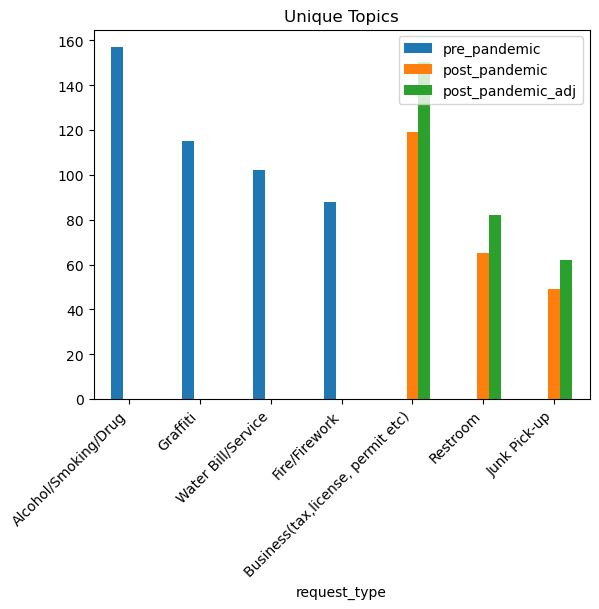

In [17]:
df_uniques = df_all[np.any([df_all['post_pandemic']==0, df_all['pre_pandemic']==0],axis=0)]
df_uniques.plot.bar(x='request_type', rot=90)
plt.xticks(rotation=45, ha='right')
plt.title('Unique Topics')
plt.show()

In [18]:
df_uniques

,request_type,pre_pandemic,post_pandemic,post_pandemic_adj
18,Alcohol/Smoking/Drug,157.0,0.0,0.000000
19,Graffiti,115.0,0.0,0.000000
20,Water Bill/Service,102.0,0.0,0.000000
21,Fire/Firework,88.0,0.0,0.000000
22,"Business(tax,license, permit etc)",0.0,119.0,150.315789
23,Restroom,0.0,65.0,82.105263
24,Junk Pick-up,0.0,49.0,61.894737


## 2.2 Requests type that increased/decreased number after pandemic

In [19]:
df_com = df_all[(df_all!=0).all(axis=1)].reset_index(drop=True)
df_com.loc[:,'Increase'] = (df_com['post_pandemic_adj'] - df_com['pre_pandemic']).values
df_com.sort_values(by='Increase')

,request_type,pre_pandemic,post_pandemic,post_pandemic_adj,Increase
0,Parking Violation,5987.0,3135.0,3960.000000,-2027.000000
5,Sewage/Drainage,893.0,97.0,122.526316,-770.473684
1,Homeless/Panhandler,3653.0,2393.0,3022.736842,-630.263158
3,Trash,912.0,258.0,325.894737,-586.105263
9,Speeding,477.0,145.0,183.157895,-293.842105
12,Neighboorhood Complaint,270.0,85.0,107.368421,-162.631579
4,Street/Sidewalk Infra,912.0,615.0,776.842105,-135.157895
7,Pothole,564.0,363.0,458.526316,-105.473684
2,Plant,1479.0,1136.0,1434.947368,-44.052632
17,Utility Cable/Box,162.0,96.0,121.263158,-40.736842


In [20]:
df_inc = df_com[(df_com['post_pandemic_adj']>=df_com['pre_pandemic'])].sort_values('Increase',ascending=False,ignore_index=True)
df_dec = df_com[(df_com['post_pandemic_adj']<=df_com['pre_pandemic'])].sort_values('Increase',ignore_index=True)

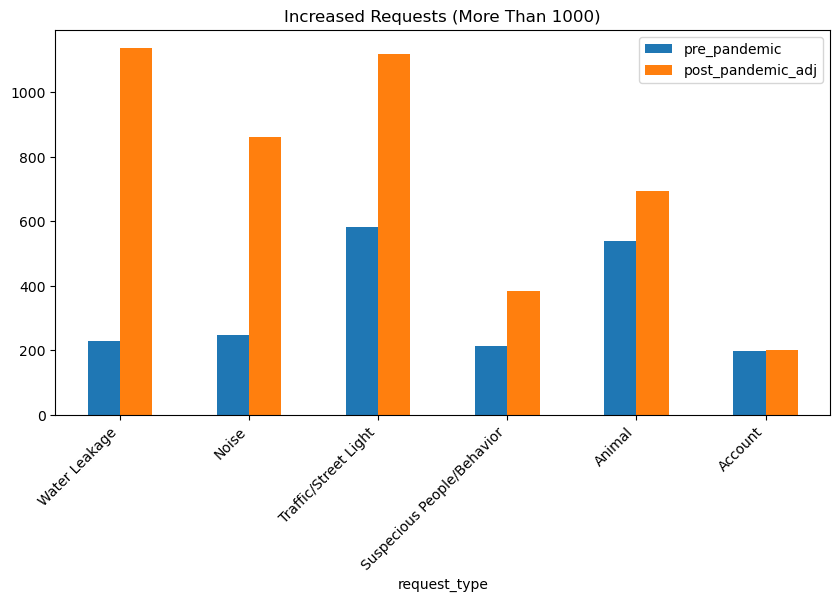

In [21]:
df_inc.plot.bar(x='request_type',y=['pre_pandemic','post_pandemic_adj'],figsize=(10,5))
plt.xticks(rotation=45, ha='right')
plt.title('Increased Requests (More Than 1000)')
plt.show()

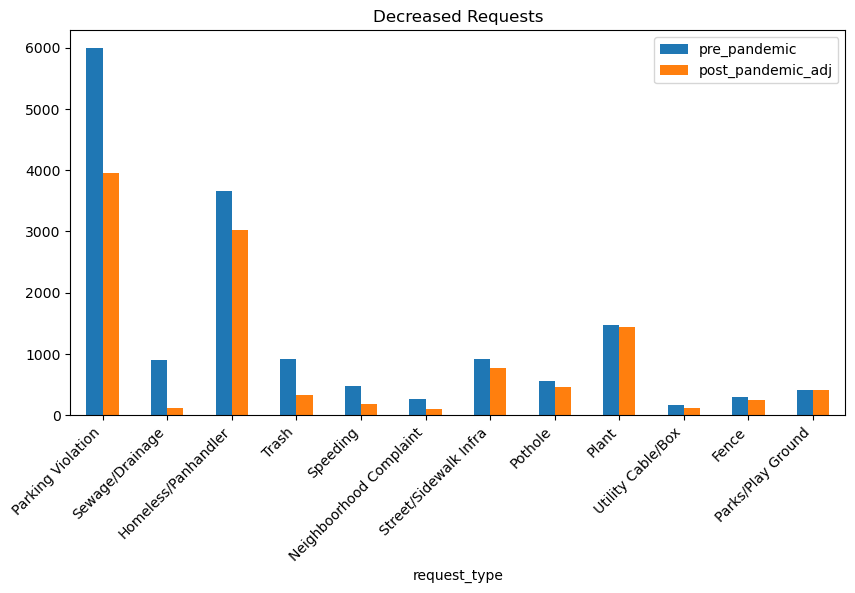

In [22]:
df_dec.plot.bar(x='request_type',y=['pre_pandemic','post_pandemic_adj'],figsize=(10,5))
plt.xticks(rotation=45, ha='right')
plt.title('Decreased Requests')
plt.show()

In [23]:
request = df_all['request_type'].values
diff_num = (df_all['post_pandemic_adj'] - df_all['pre_pandemic']).values
ind_least, ind_max = np.argsort(diff_num)[:3], np.argsort(diff_num)[::-1][:3]
print('Below are the request that decreasd the most after pandemic:')
for req, num in zip(request[ind_least], diff_num[ind_least]):
    print(f'{req}: decreased by {round(-1*num)}')



Below are the request that decreasd the most after pandemic:
Parking Violation: decreased by 2027
Sewage/Drainage: decreased by 770
Homeless/Panhandler: decreased by 630


In [24]:
print('Below are the request that increased the most after pandemic:')
for req, num in zip(request[ind_max], diff_num[ind_max]):
    print(f'{req}: increased by {round(num)}')

Below are the request that increased the most after pandemic:
Water Leakage: increased by 908
Noise: increased by 611
Traffic/Street Light: increased by 537


In [25]:
df_all_n0 = df_all[df_all['pre_pandemic']!=0]
n0_request = df_all_n0['request_type'].values
diff_perc = (df_all_n0['post_pandemic_adj']/df_all_n0['pre_pandemic']-1).values


In [26]:
ind_least, ind_max = np.argsort(diff_perc)[:3], np.argsort(diff_perc)[::-1][:3]
print('Below are the request that decreasd the most after pandemic:')
for req, num in zip(n0_request[ind_least], diff_perc[ind_least]):
    print(f'{req}: decreased by {round(num*100)}%')

Below are the request that decreasd the most after pandemic:
Fire/Firework: decreased by -100%
Graffiti: decreased by -100%
Alcohol/Smoking/Drug: decreased by -100%


In [27]:
print('Below are the request that increased the most after pandemic:')
for req, num in zip(n0_request[ind_max], diff_perc[ind_max]):
    print(f'{req}: increased by {round(num*100)}%')

Below are the request that increased the most after pandemic:
Water Leakage: increased by 398%
Noise: increased by 245%
Traffic/Street Light: increased by 92%


## 2.4 Request Counts By District

In [28]:
df_loc_pre = df_pre[~df_pre['final_label_verb'].isin(rows_to_drop)]
df_loc_pst = df_pst[~df_pst['final_label_verb'].isin(rows_to_drop)]
df_loc_pre = df_loc_pre[pd.notna(df_loc_pre['District'])]
df_loc_pst = df_loc_pst[pd.notna(df_loc_pst['District'])]


In [29]:
df_loc_pre = df_loc_pre[['District', 'final_label_verb', 'Incident_ID']]
df_loc_pst = df_loc_pst[['District', 'final_label_verb', 'Incident_ID']]

In [30]:
df_num_pre = df_loc_pre.groupby(['District']).size().reset_index(name='counts')
df_num_pst = df_loc_pst.groupby(['District']).size().reset_index(name='counts')
df_num = pd.merge(df_num_pre, df_num_pst, on='District', how='outer')
df_num.rename(columns={'counts_x':'pre_counts', 'counts_y':'pst_counts'},inplace=True)
df_num

,District,pre_counts,pst_counts
0,0.0,555,2997
1,1.0,952,696
2,2.0,1411,717
3,3.0,3335,1750
4,4.0,1254,769
5,5.0,1350,608
6,6.0,1743,1247
7,7.0,2415,911
8,8.0,1383,755
9,9.0,2920,842


In [31]:
# adjust the pst counts for timeframe length
df_num['pst_counts'] *= 24/19
df_num

,District,pre_counts,pst_counts
0,0.0,555,3785.684211
1,1.0,952,879.157895
2,2.0,1411,905.684211
3,3.0,3335,2210.526316
4,4.0,1254,971.368421
5,5.0,1350,768.000000
6,6.0,1743,1575.157895
7,7.0,2415,1150.736842
8,8.0,1383,953.684211
9,9.0,2920,1063.578947


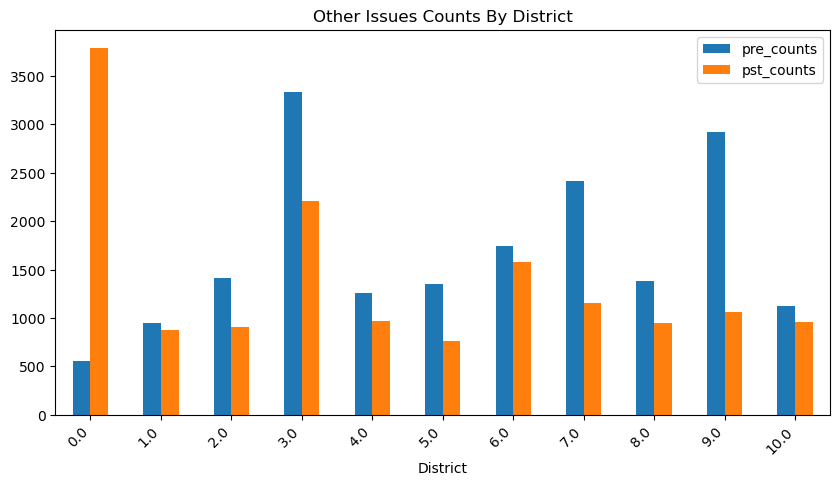

In [32]:
df_num.plot.bar(x='District',y=['pre_counts','pst_counts'],figsize=(10,5))
plt.xticks(rotation=45, ha='right')
plt.title('Other Issues Counts By District')
plt.show()

In [33]:
df1 = df_loc_pre.groupby(['District','final_label_verb']).size().reset_index(name='counts')
df2 = df_loc_pst.groupby(['District','final_label_verb']).size().reset_index(name='counts')

In [34]:
df_dist_pre = df1.loc[df1.groupby(["District"])["counts"].idxmax()]
df_dist_pst = df2.loc[df2.groupby(["District"])["counts"].idxmax()]
df_dist_pst['counts'] *= 24/19

In [35]:
df_dist_max = pd.merge(df_dist_pre, df_dist_pst, on='District', how='outer')
df_dist_max

,District,final_label_verb_x,counts_x,final_label_verb_y,counts_y
0,0.0,Parking Violation,114,Parking Violation,1013.052632
1,1.0,Parking Violation,224,Parking Violation,251.368421
2,2.0,Parking Violation,385,Parking Violation,260.210526
3,3.0,Homeless/Panhandler,771,Parking Violation,520.421053
4,4.0,Parking Violation,309,Parking Violation,256.421053
5,5.0,Parking Violation,415,Parking Violation,216.000000
6,6.0,Parking Violation,450,Parking Violation,347.368421
7,7.0,Homeless/Panhandler,828,Homeless/Panhandler,391.578947
8,8.0,Parking Violation,373,Parking Violation,223.578947
9,9.0,Parking Violation,2135,Parking Violation,252.631579


In [36]:
df_dist_max.to_csv('data/result/requests_by_district.csv',index=False)

## 2.5 Analysis On A Specific District

In [37]:
d3_pre = df1[df1.District==3]
d3_pst = df2[df2.District==3]
d3 = pd.merge(d3_pre, d3_pst, on=['District','final_label_verb'], how='outer')
d3.fillna(0, inplace=True)
d3.rename(columns={'counts_x':'pre_counts', 'counts_y':'pst_counts'}, inplace=True)
d3.pst_counts *= 24/19
d3

,District,final_label_verb,pre_counts,pst_counts
0,3.0,Account,27.0,22.736842
1,3.0,Alcohol/Smoking/Drug,28.0,0.000000
2,3.0,Animal,120.0,141.473684
3,3.0,Fence,61.0,25.263158
4,3.0,Fire/Firework,11.0,0.000000
5,3.0,Graffiti,25.0,0.000000
6,3.0,Homeless/Panhandler,771.0,423.157895
7,3.0,Neighboorhood Complaint,62.0,15.157895
8,3.0,Noise,50.0,126.315789
9,3.0,Parking Violation,770.0,520.421053


In [38]:
d3_inc = d3[(d3['pst_counts']>=d3['pre_counts'])].sort_values('pst_counts',ascending=False,ignore_index=True)
d3_dec = d3[(d3['pst_counts']<d3['pre_counts'])].sort_values('pst_counts',ascending=False,ignore_index=True)


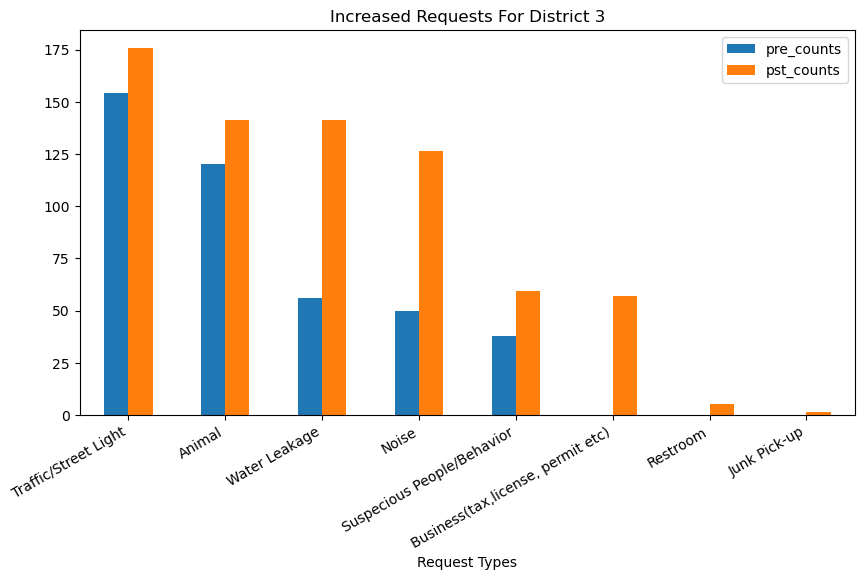

In [47]:
d3_inc.plot.bar(x='final_label_verb',y=['pre_counts','pst_counts'],figsize=(10,5))
plt.xticks(rotation=30, ha='right')
plt.xlabel('Request Types')
plt.title('Increased Requests For District 3')
plt.show()

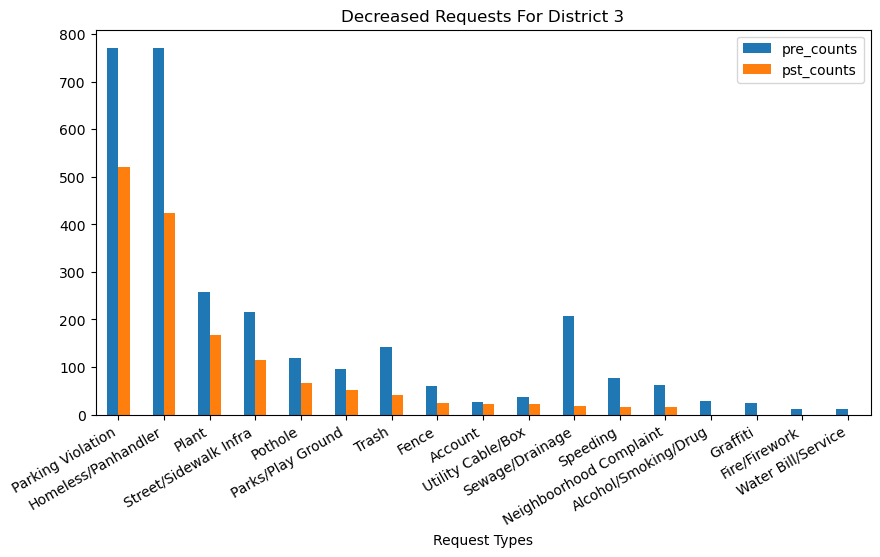

In [48]:
d3_dec.plot.bar(x='final_label_verb',y=['pre_counts','pst_counts'],figsize=(10,5))
plt.xticks(rotation=30, ha='right')
plt.xlabel('Request Types')
plt.title('Decreased Requests For District 3')
plt.show()